## Import

In [1]:
import numpy as np, pandas as pd
import seaborn as sns, pylab as plt
import os

In [2]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dirpath = "/content/drive/MyDrive/Colab Notebooks/SetpointReinforcementLearning/results/"

## Figure 1 - train

In [4]:
train_mode_n1_classique = "model_-1-classique"
train_mode_n1 = "model_-1"
train_mode0_classique = "model_0_classique"
train_mode0 = "model_0"
train_mode1 = "model_1"
train_mode2 = "model_2"

In [5]:
# columns
time = "episodes_total"
columns = ["episode_reward_max",	"episode_reward_min",	"episode_reward_mean"]

https://seaborn.pydata.org/tutorial/axis_grids.html

In [6]:
df_train = []
for t in [train_mode_n1_classique, train_mode_n1, train_mode0_classique, train_mode0, train_mode1, train_mode2] :
  df = pd.read_csv(dirpath + "progress_" + t +".csv")
  df["train"] = t
  df_train += [df]
# merge
df_train = pd.concat(df_train)
df_train.head()

,episode_reward_max,episode_reward_min,episode_reward_mean,episode_len_mean,episodes_this_iter,num_faulty_episodes,num_healthy_workers,num_in_flight_async_reqs,num_remote_worker_restarts,num_agent_steps_sampled,...,sampler_results/hist_stats/episode_lengths,sampler_results/sampler_perf/mean_raw_obs_processing_ms,sampler_results/sampler_perf/mean_inference_ms,sampler_results/sampler_perf/mean_action_processing_ms,sampler_results/sampler_perf/mean_env_wait_ms,sampler_results/sampler_perf/mean_env_render_ms,sampler_results/connector_metrics/ObsPreprocessorConnector_ms,sampler_results/connector_metrics/StateBufferConnector_ms,sampler_results/connector_metrics/ViewRequirementAgentConnector_ms,train
0,43.0,8.0,18.529412,19.529412,51,0,1,0,0,1000,...,"[24, 12, 11, 21, 26, 26, 42, 9, 13, 19, 15, 40...",0.830907,1.233865,0.122162,0.073241,0.0,0.007989,0.005248,0.124268,model_-1-classique
1,43.0,8.0,16.910000,17.910000,57,0,1,0,0,2000,...,"[13, 19, 15, 40, 24, 17, 16, 20, 16, 28, 15, 3...",0.974590,1.388140,0.130206,0.089878,0.0,0.014329,0.010911,0.243221,model_-1-classique
2,70.0,8.0,19.020000,20.020000,42,0,1,0,0,3000,...,"[15, 23, 13, 11, 23, 20, 16, 20, 18, 18, 10, 1...",1.116602,1.533106,0.138432,0.106472,0.0,0.020162,0.014993,0.341022,model_-1-classique
3,78.0,8.0,23.720000,24.720000,29,0,1,0,0,4000,...,"[17, 11, 17, 16, 26, 15, 16, 10, 23, 43, 17, 1...",1.155504,1.569704,0.140733,0.113231,0.0,0.020957,0.015419,0.351273,model_-1-classique
4,184.0,8.0,31.200000,32.200000,17,0,1,0,0,5000,...,"[10, 13, 27, 9, 16, 28, 11, 14, 21, 22, 10, 23...",1.181279,1.595091,0.142200,0.117301,0.0,0.021065,0.014032,0.354885,model_-1-classique


<Axes: >

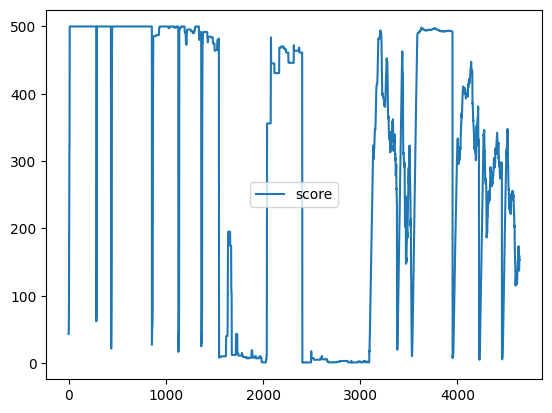

In [29]:
# select columns
df_train_ = df_train[columns].copy()
# unpivot
df_train_ = df_train_.melt(var_name='rewards', value_name="score")
df_train_.plot()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

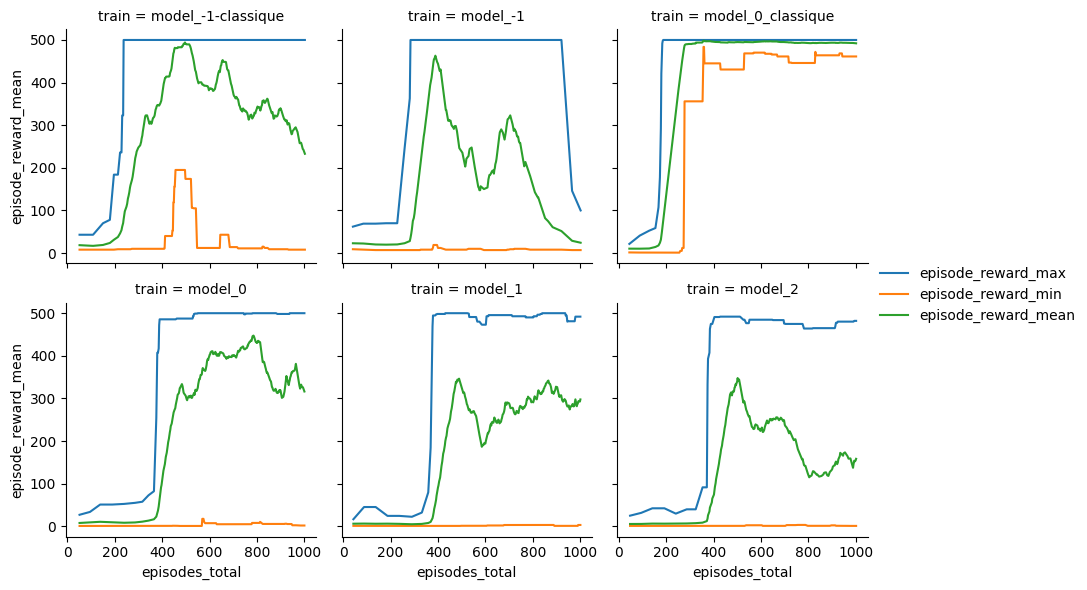

In [8]:
g = sns.FacetGrid(df_train, col="train", col_wrap=3)
for clm,clr in zip(columns,['C0', 'C1', 'C2']) :
  g.map_dataframe(sns.lineplot, x="episodes_total", y=clm, color=clr, label=clm)
g.add_legend()
plt.savefig(dirpath+"figure_train_cartpole.svg")
#files.download(dirpath+"figure_train_cartpole.svg")

## Figure Annexe

In [9]:
mode0 = "stat_cartpole_mode0.csv"
mode1 = "stat_cartpole_mode1.csv"
mode2 = "stat_cartpole_mode2.csv"

In [10]:
df_mode0 = pd.read_csv(dirpath+mode0,header=None,index_col=0,sep=';').T
df_mode1 = pd.read_csv(dirpath+mode1,header=None,index_col=0,sep=';').T
df_mode2 = pd.read_csv(dirpath+mode2,header=None,index_col=0,sep=';').T

In [11]:
df_mode0.divide(499).describe()

,Mode-1_class,Mode0_class,Mode-1,Mode0,Mode1,Mode2
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.897752,0.993144,0.970086,0.992639,0.757088,0.893405
std,0.007274,0.005667,0.046984,0.010437,0.025758,0.029074
min,0.880762,0.970942,0.521042,0.952906,0.685972,0.828457
25%,0.893387,0.990782,0.967335,0.992134,0.738277,0.873547
50%,0.896994,0.994389,0.976353,0.997996,0.758116,0.894289
75%,0.902405,0.997996,0.983567,0.997996,0.776152,0.913226
max,0.918637,0.997996,0.996192,0.997996,0.814028,0.965531


In [12]:
df_mode1.divide(499).describe()

,Mode-1_class,Mode0_class,Mode-1,Mode0,Mode1,Mode2
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.270439,0.313311,0.308160,0.324164,0.632513,0.855331
std,0.277613,0.362943,0.342489,0.354576,0.338183,0.136852
min,0.099800,0.099800,0.004810,0.007415,0.003607,0.099800
25%,0.123246,0.099800,0.099800,0.099800,0.639529,0.804108
50%,0.134970,0.099800,0.105210,0.099800,0.735571,0.868136
75%,0.203056,0.388377,0.454659,0.573697,0.890230,0.953357
max,0.916834,0.997996,0.997996,0.997996,0.988978,0.985371


In [13]:
df_mode2.divide(499).describe()

,Mode-1_class,Mode0_class,Mode-1,Mode0,Mode1,Mode2
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.355804,0.327090,0.386719,0.427894,0.539222,0.831361
std,0.337570,0.372219,0.109340,0.115277,0.286977,0.106208
min,0.099800,0.099800,0.019639,0.184569,0.003607,0.422645
25%,0.125050,0.099800,0.301804,0.350501,0.304559,0.831162
50%,0.139479,0.099800,0.385671,0.437074,0.681162,0.857315
75%,0.820341,0.729709,0.466383,0.501102,0.782014,0.886623
max,0.933066,0.997996,0.617435,0.738277,0.915030,0.945691


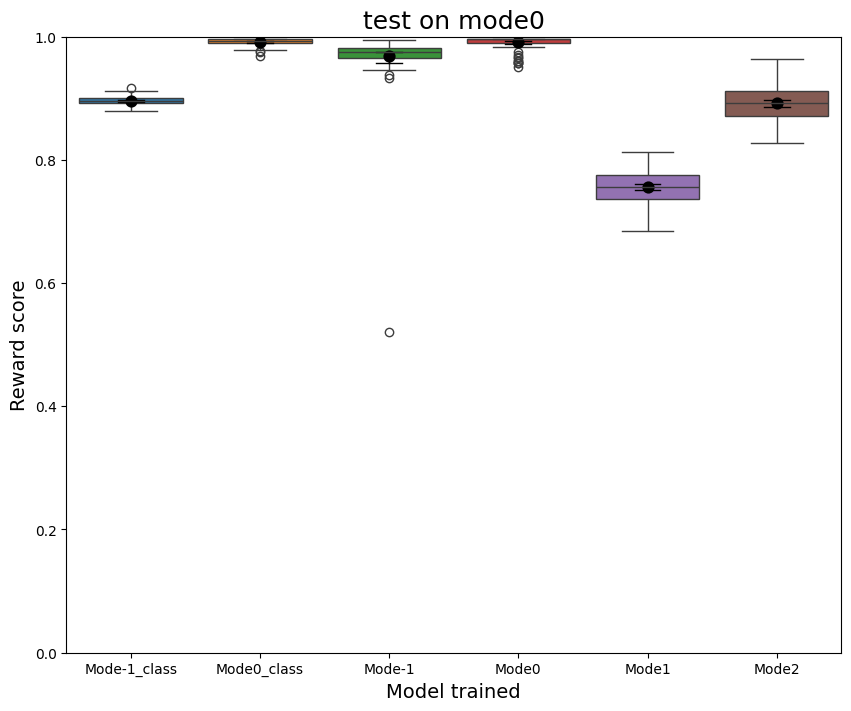

In [14]:
# figure size
plt.figure(figsize=(10, 8))
# make boxplot with Seaborn with means
# using showmeans=True
sns.boxplot(data=df_mode0.divide(500))
sns.pointplot(data=df_mode0.divide(500), color='k', linestyle="none", err_kws={'linewidth': 1.}, capsize=0.2)
plt.ylim(0,1)
plt.xlabel("Model trained", size=14)
plt.ylabel("Reward score", size=14)
plt.title("test on mode0", size=18)
plt.show()

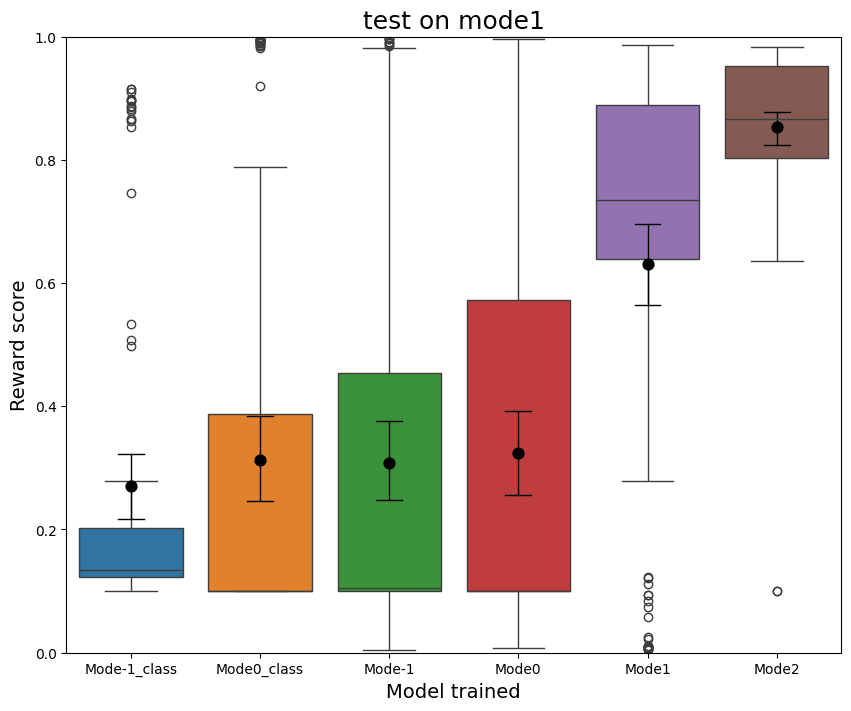

In [15]:
# figure size
plt.figure(figsize=(10, 8))
# make boxplot with Seaborn with means
# using showmeans=True
sns.boxplot(data=df_mode1.divide(500))
sns.pointplot(data=df_mode1.divide(500), color='k', linestyle="none", err_kws={'linewidth': 1.}, capsize=0.2)
plt.ylim(0,1)
plt.xlabel("Model trained", size=14)
plt.ylabel("Reward score", size=14)
plt.title("test on mode1", size=18)
plt.show()

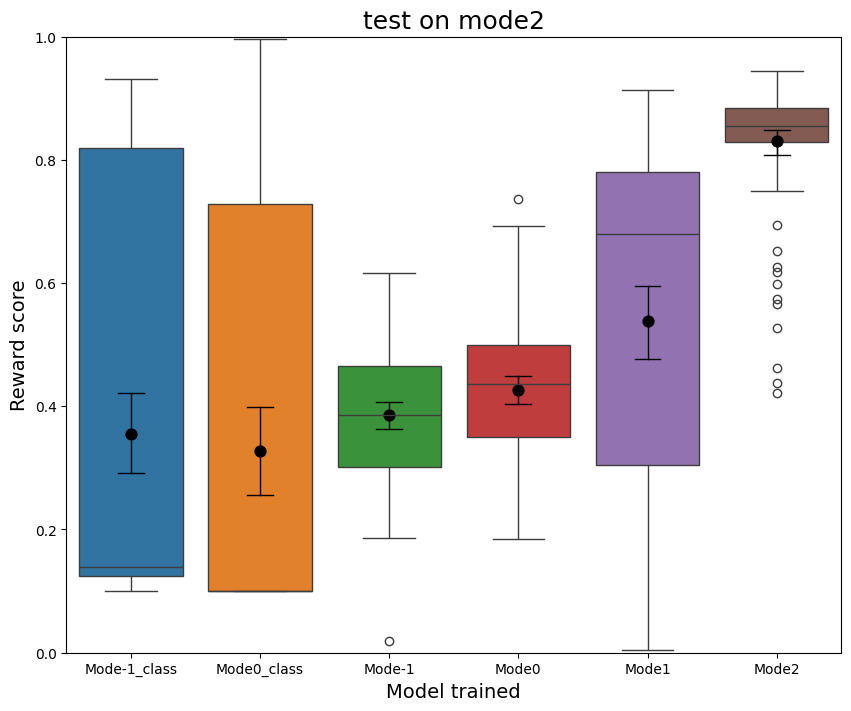

In [16]:
# figure size
plt.figure(figsize=(10, 8))
# make boxplot with Seaborn with means
# using showmeans=True
sns.boxplot(data=df_mode2.divide(500))
sns.pointplot(data=df_mode2.divide(500), color='k', linestyle="none", err_kws={'linewidth': 1.}, capsize=0.2)
plt.ylim(0,1)
plt.xlabel("Model trained", size=14)
plt.ylabel("Reward score", size=14)
plt.title("test on mode2", size=18)
plt.show()

      Mode-1_class	Mode0_class	Mode-1	Mode0	Mode1	Mode2

mode0 0.896994	0.994389	0.976353	**0.997996**	0.758116	0.894289

mode1 0.896994	0.994389	0.976353	0.997996	0.758116	0.894289

mode2 0.139479	0.099800	0.385671	0.437074	0.681162	**0.857315**

https://www.geeksforgeeks.org/grouped-boxplots-in-python-with-seaborn/

In [17]:
# unpivot
df_0 = df_mode0.melt(var_name='model_trained', value_name='score')
df_1 = df_mode1.melt(var_name='model_trained', value_name='score')
df_2 = df_mode2.melt(var_name='model_trained', value_name='score')
# add
df_0["tested_on"] = "Mode0"
df_1["tested_on"] = "Mode1"
df_2["tested_on"] = "Mode2"
# merge
df_new = pd.concat([df_0,df_1,df_2])
df_new.head()

,model_trained,score,tested_on
0,Mode-1_class,450.3,Mode0
1,Mode-1_class,450.3,Mode0
2,Mode-1_class,455.7,Mode0
3,Mode-1_class,445.8,Mode0
4,Mode-1_class,445.8,Mode0


(0.0, 1.0)

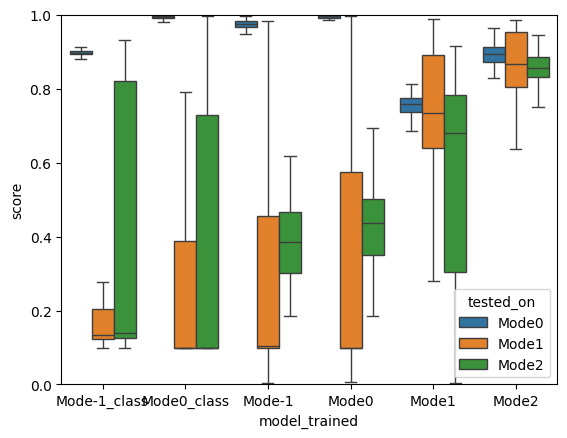

In [18]:
sns.boxplot(x = df_new['model_trained'], y = df_new['score'].divide(499), hue = df_new['tested_on'], showfliers = False)
plt.ylim(0,1)